In [52]:
pip install --upgrade seaborn palettable

Note: you may need to restart the kernel to use updated packages.


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import palettable
import textwrap


pd.set_option('display.max_columns', None)

In [54]:
sns.__version__

'0.13.2'

# 1. Problem definition

This project's [data](https://github.com/rfordatascience/tidytuesday/blob/main/data/2024/2024-01-23/readme.md) is also from tidytuesday challenge. It was explored in the July 2023 article ["Why do children and young people in smaller towns do better academically than those in larger towns?"](https://www.ons.gov.uk/peoplepopulationandcommunity/educationandchildcare/articles/whydochildrenandyoungpeopleinsmallertownsdobetteracademicallythanthoseinlargertowns/2023-07-25).

The challenge is to recreate the plots found in the article. Including an interactive plot. This involves attempting to discover previously unrecognized insights in the dataset.

## Objectives for this project

1. Articulte a nice well-written problem definition
2. Dive more into EDA and data visulizations. Create more visuzualitions if they are simple. Try to create a note in Obsidian on the types of plots and divide them into categories: continous, categorical, relational (something of this sort).
3. Use plotly for the interactive plot found in the article.

# 2. Data Collection

In [55]:
original_df = pd.read_csv("/kaggle/input/english-education/tidytuesday_20240123_english_education.csv")
original_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,town11cd,town11nm,population_2011,size_flag,rgn11nm,coastal,coastal_detailed,ttwa11cd,ttwa11nm,ttwa_classification,job_density_flag,income_flag,university_flag,level4qual_residents35_64_2011,ks4_2012_2013_counts,key_stage_2_attainment_school_year_2007_to_2008,key_stage_4_attainment_school_year_2012_to_2013,level_2_at_age_18,level_3_at_age_18,activity_at_age_19_full_time_higher_education,activity_at_age_19_sustained_further_education,activity_at_age_19_appprenticeships,activity_at_age_19_employment_with_earnings_above_0,activity_at_age_19_employment_with_earnings_above_10_000,activity_at_age_19_out_of_work,highest_level_qualification_achieved_by_age_22_less_than_level_1,highest_level_qualification_achieved_by_age_22_level_1_to_level_2,highest_level_qualification_achieved_by_age_22_level_3_to_level_5,highest_level_qualification_achieved_by_age_22_level_6_or_above,highest_level_qualification_achieved_b_age_22_average_score,education_score
0,E34000007,Carlton in Lindrick BUA,5456.0,Small Towns,East Midlands,Non-coastal,Smaller non-coastal town,E30000291,Worksop and Retford,Majority town and city (small),Residential,Higher deprivation towns,No university,Low,65,65.000000,70.769231,72.307692,50.769231,30.769231,21.538462,NaN,52.307692,36.923077,NaN,NaN,34.9,39.7,NaN,3.323077,-0.533750
1,E34000016,Dorchester (West Dorset) BUA,19060.0,Small Towns,South West,Non-coastal,Smaller non-coastal town,E30000046,Dorchester and Weymouth,Majority town and city (small),Working,Mid deprivation towns,No university,Medium,239,69.058296,71.129707,85.714286,60.084034,41.841004,13.389121,10.041841,51.046025,24.686192,4.184100,NaN,21.7,44.6,33.3,3.732218,1.952019
2,E34000020,Ely BUA,19090.0,Small Towns,East of England,Non-coastal,Smaller non-coastal town,E30000186,Cambridge,Majority town and city (Large Towns),Working,Lower deprivation towns,No university,Medium,155,71.428571,56.129032,83.870968,45.806452,35.483871,10.967742,7.741935,57.419355,27.741935,NaN,NaN,34.4,31.2,32.5,3.548387,-1.044128
3,E34000026,Market Weighton BUA,6429.0,Small Towns,Yorkshire and The Humber,Non-coastal,Smaller non-coastal town,E30000220,Hull,Majority town and city (Large Towns),Residential,Lower deprivation towns,No university,Medium,58,70.967742,53.448276,91.228070,49.122807,25.862069,25.862069,NaN,58.620690,31.034483,NaN,NaN,NaN,66.1,NaN,3.482759,-1.249262
4,E34000027,Downham Market BUA,10884.0,Small Towns,East of England,Non-coastal,Smaller non-coastal town,E30000225,King's Lynn,Majority rural,Mixed,Higher deprivation towns,No university,Low,93,78.048780,62.365591,78.494624,40.860215,26.881720,20.430108,15.053763,55.913978,30.107527,15.053763,NaN,32.6,44.2,NaN,3.161290,-1.169078


In [56]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 31 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   town11cd                                                           1100 non-null   object 
 1   town11nm                                                           1104 non-null   object 
 2   population_2011                                                    1100 non-null   float64
 3   size_flag                                                          1104 non-null   object 
 4   rgn11nm                                                            1102 non-null   object 
 5   coastal                                                            1100 non-null   object 
 6   coastal_detailed                                                   1100 non-null   object 
 7   ttwa11cd                

/tmp/ipykernel_120/1579900229.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



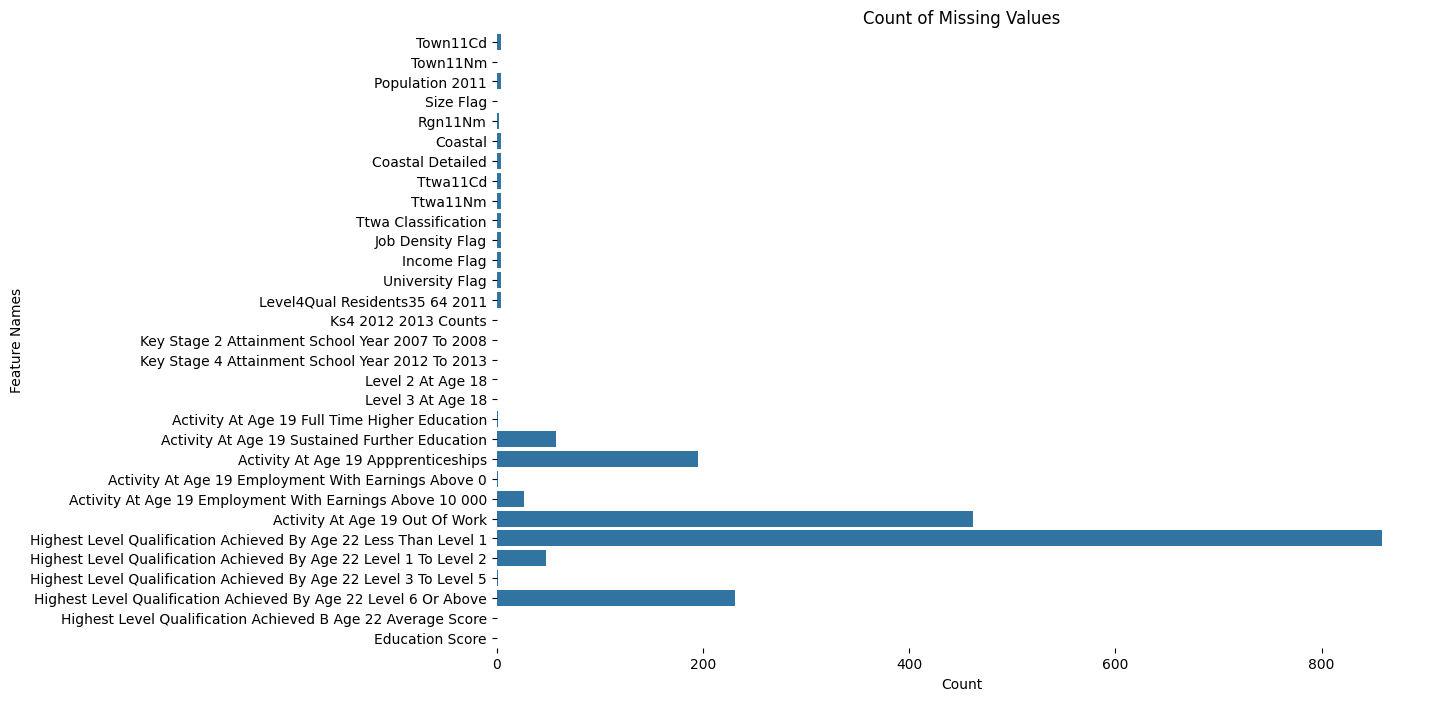

In [57]:
missing_values = original_df.isna().sum()

missing_values = missing_values.reset_index()
missing_values.columns = ['column', 'count']

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=missing_values,
    y='column', 
    x='count',
)

ax.set_yticklabels([column_name.title().replace('_', ' ') for column_name in missing_values['column']])
ax.set_title('Count of Missing Values')
ax.set_xlabel('Count')
ax.set_ylabel('Feature Names')
plt.show()

## Value count

In [58]:
object_features = original_df.select_dtypes(include='object')

for feature in object_features.columns:
    if original_df[feature].nunique() < 20:
        print(original_df[feature].value_counts())
        print('--------------------------')

size_flag
Small Towns         662
Medium Towns        331
Large Towns          89
City                 18
Inner London BUA      1
Outer london BUA      1
Other Small BUAs      1
Not BUA               1
Name: count, dtype: int64
--------------------------
rgn11nm
South East                  217
North West                  171
East of England             150
South West                  138
East Midlands               134
Yorkshire and The Humber    125
West Midlands                94
North East                   71
London                        2
Name: count, dtype: int64
--------------------------
coastal
Non-coastal    947
Coastal        153
Name: count, dtype: int64
--------------------------
coastal_detailed
Smaller non-coastal town      584
Large non-coastal town        352
Smaller seaside town           50
Large seaside town             47
Smaller other coastal town     28
Large other coastal town       21
Cities                         18
Name: count, dtype: int64
----------------

# 3. Data Preprocessing

No need for preprocessing for this dataset

# 4. EDA (Recreating plots in the article)

I'll leave the first (which is also the interacive) plot til last.

## 1. Educational attainment score, by town size, England

In [134]:
data = pd.read_csv("/kaggle/input/education-by-townsize/tidytuesday_20240123_english_education_by_town_size.csv")

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TOWN11CD                      1104 non-null   object 
 1   TOWN11NM                      1104 non-null   object 
 2   Town size                     1104 non-null   object 
 3   Educational attainment score  1104 non-null   float64
dtypes: float64(1), object(3)
memory usage: 34.6+ KB


In [136]:
data['Town size'].unique()

array(['Small Towns', 'Medium Towns', 'Large Towns', 'City', 'London',
       'Not BUA', 'Other Small BUAs'], dtype=object)

In [137]:
data = data[~data['Town size'].isin(['Other Small BUAs', 'Not BUA'])]

In [138]:
fig = px.scatter(
    data, 
    y="Town size", 
    x="Educational attainment score",
    category_orders ={
        "Town size": ['Small Towns', 'Medium Towns', 'Large Towns', 'City', 'London', 'Other Small BUAs', 'Not BUA']
    }
)

fig.show()

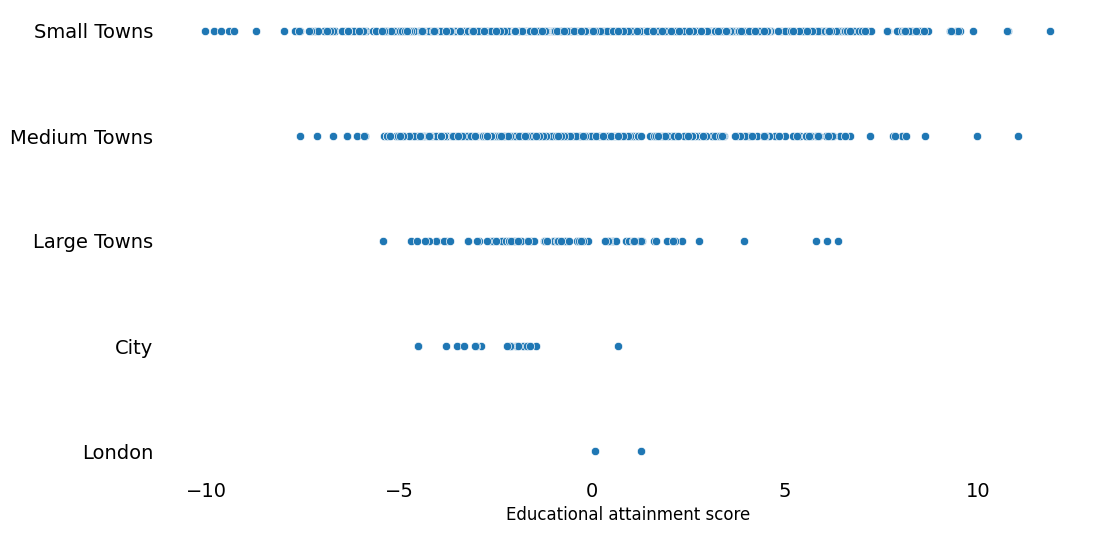

In [154]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(
    data=data, 
    y="Town size", 
    x="Educational attainment score",
)

# To remove the hyphens on the axes
ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelsize=14,
)

ax.set(ylabel=None)
ax.set_xlabel('Educational attainment score', fontsize=12,)

plt.show()

## 2. Income deprivation group by town size

Improvements:
1. Reorder bars
2. ~~Remove the extra padding on the right. For the right edge of the axis to touch the bars.~~

In [64]:
plotting_data = (original_df.groupby('size_flag')['income_flag'].value_counts(normalize=True) * 100).round(1)
plotting_data

size_flag     income_flag             
City          Cities                      100.0
Large Towns   Higher deprivation towns     68.5
              Lower deprivation towns      15.7
              Mid deprivation towns        15.7
Medium Towns  Higher deprivation towns     48.3
              Lower deprivation towns      31.1
              Mid deprivation towns        20.5
Small Towns   Lower deprivation towns      49.4
              Higher deprivation towns     32.0
              Mid deprivation towns        18.6
Name: proportion, dtype: float64

In [65]:
custom_sort = {
    'Higher deprivation towns': 0,
    'Mid deprivation towns': 1,
    'Lower deprivation towns': 2,
    'Cities': 3,
}

plotting_data.sort_index(key=lambda x: x.map(custom_sort), inplace=True)

In [66]:
plotting_data

size_flag     income_flag             
Large Towns   Higher deprivation towns     68.5
Medium Towns  Higher deprivation towns     48.3
Small Towns   Higher deprivation towns     32.0
Large Towns   Mid deprivation towns        15.7
Medium Towns  Mid deprivation towns        20.5
Small Towns   Mid deprivation towns        18.6
Large Towns   Lower deprivation towns      15.7
Medium Towns  Lower deprivation towns      31.1
Small Towns   Lower deprivation towns      49.4
City          Cities                      100.0
Name: proportion, dtype: float64

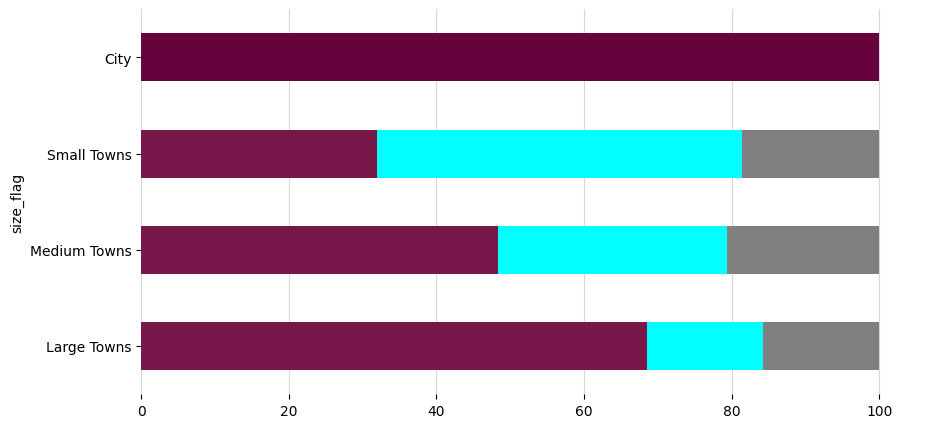

In [67]:
# Remove frames from figures 
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

fig, ax = plt.subplots(figsize=(10, 5))

plotting_data.unstack().plot(
    kind='barh', 
    stacked=True, 
    color={
        "Cities": "#66023c",
        "Higher deprivation towns": "#78184a",
        "Mid deprivation towns": "grey",
        "Lower deprivation towns": "cyan",
        
    },
    ax=ax,
)

# Remove legend
ax.legend().set_visible(False)

plt.grid(True, axis='x', alpha=0.5)
# Show the grid behind the plot
ax.set_axisbelow(True)

plt.show()

## 3. Educational attainment score of the 2012 to 2013 school year GCSE cohort, and income deprivation score, by town

Improvements:
1. Add padding around the axis/figure
2. ~~Add line at 0~~

In [128]:
data = pd.read_csv("/kaggle/input/income-vs-attainment6/tidytuesday_20240123_english_education_incomve_vs_attainment.csv")
data.head()

,TOWN11CD,Town name,Educational attainment score,Income deprivation score
0,E34000007,Carlton in Lindrick BUA,-0.53,0.85
1,E34000016,Dorchester (West Dorset) BUA,1.95,0.91
2,E34000020,Ely BUA,-1.04,0.93
3,E34000026,Market Weighton BUA,-1.25,0.94
4,E34000027,Downham Market BUA,-1.17,0.88


In [129]:
# Added a little noise to appear similar to the one in the article
# For whatever reason the values for 'Income deprivation score' seem stagnent at certain values.
data['Income deprivation score'] = data['Income deprivation score'] + np.random.normal(0, 0.01, data.shape[0])

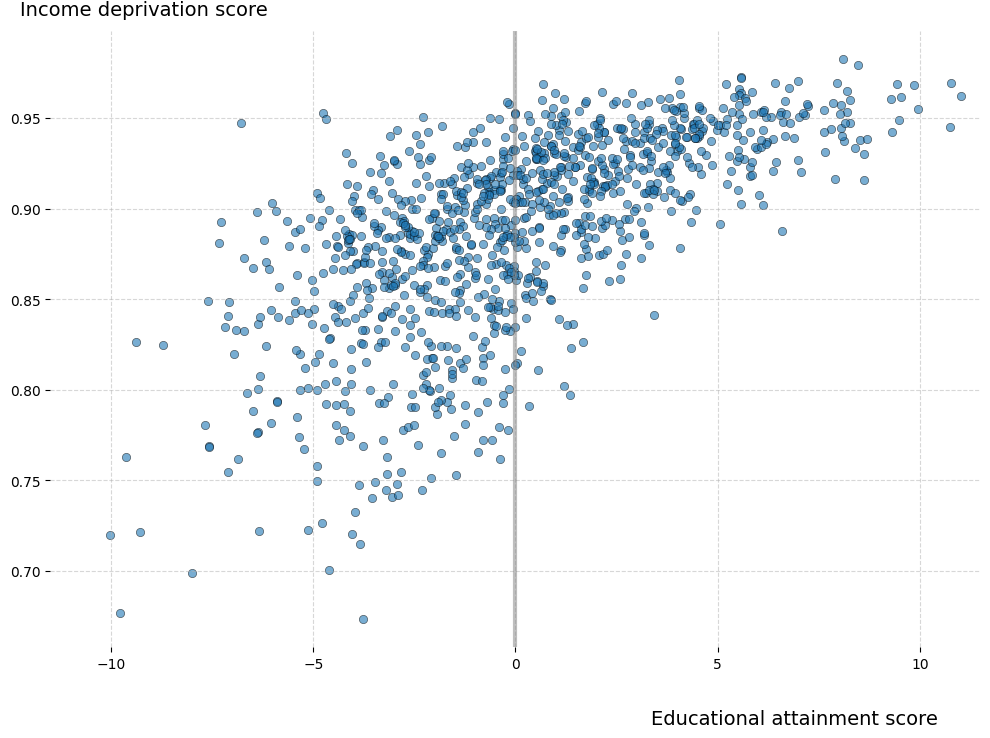

In [132]:
# Remove frames from figures 
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(
    data=data,
    x='Educational attainment score',
    y='Income deprivation score',
    alpha=0.6,
    edgecolor="black",
    ax=ax,
)

ax.set_xlabel("Educational attainment score", fontsize=14, wrap=True)
ax.xaxis.set_label_coords(0.8, -0.1)

ax.set_ylabel("Income deprivation score", rotation=360, fontsize=14)
ax.yaxis.set_label_coords(0.1,1.02)

plt.xlim([-11.5, 11.5])

ax.axvline(0, color="grey", alpha=0.5, linewidth=3)

plt.grid(True, alpha=0.5,  linestyle='--')
plt.show()

## 4. Average educational attainment score for towns, by region and income deprivation level

Improvements:
1. ~~Custom sort regions~~
2. ~~Remove xticks' and yticks' hyphens~~
3. ~~Grid Lines~~
4. ~~Vertical Line at 0~~
5. ~~Remove xlabel and ylabel~~
6. ~~Darken the background color a little bit~~

In [95]:
data = pd.read_csv('/kaggle/input/attainment-by-region/tidytuesday_20240123_english_education_attainment_by_region.csv')
data

,Region,Higher deprivation towns,Mid deprivation towns,Lower deprivation towns
0,North East,-2.139,1.421,4.633
1,North West,-1.302,1.721,5.005
2,Yorkshire and The Humber,-2.762,1.421,2.756
3,East Midlands,-2.963,-1.176,2.235
4,West Midlands,-2.175,-0.511,2.955
5,East of England,-3.349,-1.921,2.597
6,South East,-3.488,-1.550,2.649
7,South West,-2.449,-1.177,0.996


In [96]:
custom_sort = {
    "North West": 0,
    "North East": 1,
    "Yorkshire and The Humber": 2,
    "West Midlands": 3,
    "East Midlands": 4,
    "South East": 5,
    "East of England": 6,
    "South West": 7,
}

data.sort_values(by='Region', ascending=False, key=lambda x: x.map(custom_sort), inplace=True)

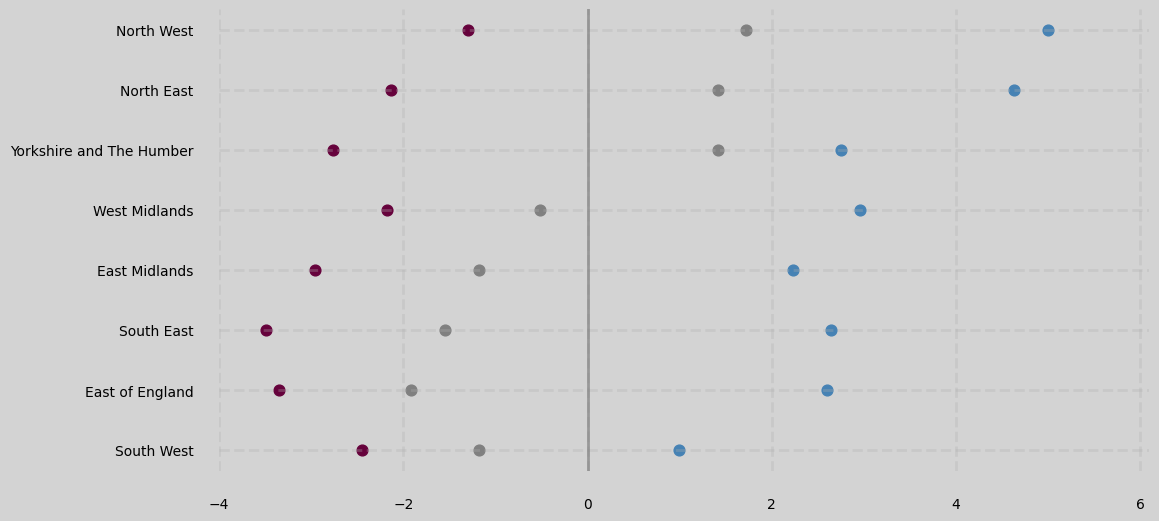

In [126]:
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False

fig, ax = plt.subplots(figsize=(12, 6))

data.plot(
    kind='scatter',
    x='Higher deprivation towns',
    y='Region',
    color='#66023c',
    s=60,
    ax=ax
)

data.plot(
    kind='scatter',
    x='Mid deprivation towns',
    y='Region',
    color='grey',
    s=60,
    ax=ax
)

data.plot(
    kind='scatter',
    x='Lower deprivation towns',
    y='Region',
    color='#4682b4',
    s=60,
    ax=ax
)

plt.xlim([-4, 6.1])

ax.set(xlabel=None, ylabel=None)

ax.axvline(x=0, linewidth=2, alpha=0.7, color='grey')

ax.set_facecolor('#d3d3d3')
fig.set_facecolor('#d3d3d3')

# To remove the hyphens on the axes
ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=True,
    pad=15,
)

ax.grid(visible=True, linestyle='--', linewidth=2, alpha=0.3)

plt.show()